## Berkeley Capstone project - Convolutional neural network to classify traffic signs 

This is the final Capstone project for Berkeley for the professional certificate in Machine learning and artificial intelligence program, for this final project I followed the CRISP-DM model to develop a  Machine learning model that can be used to identify traffic signs.   

### Step 1: Business Understanding 

A key component of Autonomous vehicles is the accurate detection and interpretation of traffic signs, as it plays a crucial role in enabling these vehicles to navigate intelligently and interact seamlessly with their surroundings. In addition,  safety is a critical requirement for autonomous vehicles so the accurate recognition of traffic signs is vital for the proper operation of these vehicles.

in this exercise, we implemented a convolutional neural network using the Kaggle dataset GTSRB - German Traffic Sign Recognition Benchmark, which is a multi-class, single-image classification dataset. since this is a scholastic exercise we aim to achieve >90% on tets accuracy   

### STEP 2: Data Understanding 

The dataset is from Kaggle.com and can be found at this location: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign 

In [148]:
import keras
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras.utils as image
from keras.utils import load_img
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from sklearn.metrics import accuracy_score

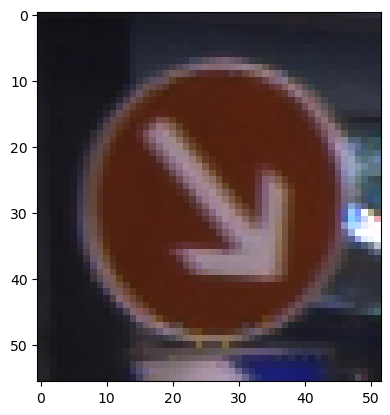

In [149]:
#data visualization - the following code help us to visualize the images of the traffic signals in the data set
img = cv2.imread(r'C:\Users\ppachuca\Berkerley\capstone_final\traffic-sign-dataset-classification\Test\00005.png') 
plt.imshow(img) 

In [150]:
#in addition to the images the Kaggle data set provides two CSV files, one for Train and other for Test
train = pd.read_csv('traffic-sign-dataset-classification/Train.csv')
train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [151]:
test = pd.read_csv('traffic-sign-dataset-classification/Test.csv')
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


### Step 3: Data Preparation 

In [152]:
#our first step in preparing the data is to retrieve the images and their labels and we know that the data is divided in 43 classes  
from PIL import Image
imgs_path = r'C:\Users\ppachuca\Berkerley\capstone_final\traffic-sign-dataset-classification'

data = []
labels = []
classes = 43
 

# cretae array with images and labels  
for i in range(classes):
    path = os.path.join(imgs_path,'Train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append([image,i])  
        except:
            print()


In [138]:
# our next step is to randomly shuffle the images in the array
random.shuffle(data)

In [153]:
print(len(data))

39209


In [154]:
x = []
y = []

#crerate features and target variable arrays  
for icon,label in data:
    x.append(icon)
    y.append(label)

x = np.array(x)
y = np.array(y)

In [155]:
# split data set in X_train and y_train, X_val and y_val with a 80/20 ratio 
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [156]:
X_train = X_train
X_val = X_val

### Step 4 Modeling

In [157]:
#we build a Convulutional neuran model 
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(30, 30, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\ppachuca\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [158]:
#fit our model with epochs=15
model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.0986 - loss: 4.3724 - val_accuracy: 0.4455 - val_loss: 1.8003
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.3216 - loss: 2.1760 - val_accuracy: 0.5848 - val_loss: 1.2762
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.5099 - loss: 1.4993 - val_accuracy: 0.7663 - val_loss: 0.6967
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6574 - loss: 1.0567 - val_accuracy: 0.9082 - val_loss: 0.2983
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8216 - loss: 0.5889 - val_accuracy: 0.9373 - val_loss: 0.2057
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8843 - loss: 0.3949 - val_accuracy: 0.9588 - val_loss: 0.1521
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9321 - loss: 0.2456 - val_accuracy: 0.9695 - val_loss: 0.1107
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9369 - loss: 0.2270 - v

## Step 5: Evaluation 

In [159]:
#testing accuracy on test dataset
y_test = pd.read_csv('traffic-sign-dataset-classification/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)

#Test data Accuracy 
print(accuracy_score(labels, pred))

395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0.9346793349168646


## Step 6: Deployment 

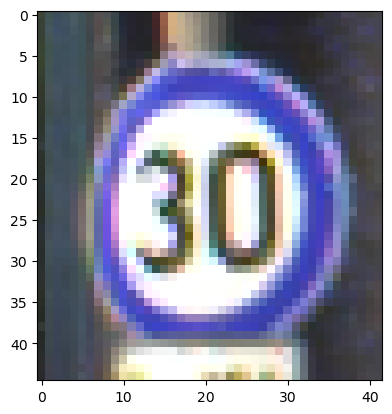

In [160]:
# for deployment we just try with some examples and very basic code
img = cv2.imread(r'C:\Users\ppachuca\Berkerley\Module_24\traffic-sign-dataset-classification\Test\00001.png') 
plt.imshow(img)

In [166]:
from keras.utils import load_img, img_to_array
path = r'C:\Users\ppachuca\Berkerley\Module_24\traffic-sign-dataset-classification\Test\00001.png'
img = load_img(path, target_size = (30,30)) #load the image
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

value = classes = np.argmax(model.predict(images,batch_size=32),axis=-1)

if classes[0]==1:
    print('Speed limit (30km/h)') #print if image is accurate 
else: 
    print ('fail test')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Speed limit (30km/h)
